In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Mnist is a database of handwritten digits

training set of 60000 example and test has 10000 example

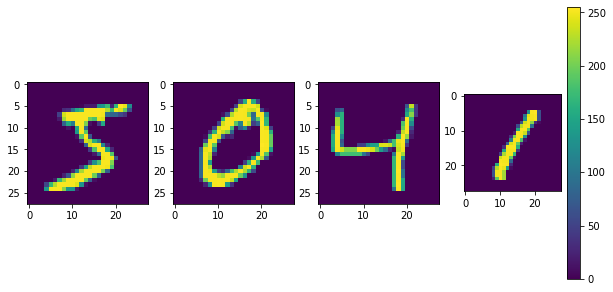

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
plt.imshow(x_train[0])

plt.subplot(1,4,2)
plt.imshow(x_train[1])

plt.subplot(1,4,3)
plt.imshow(x_train[2])

plt.subplot(1,4,4)
plt.imshow(x_train[3])

plt.colorbar()
plt.show()

In [ ]:
x_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train.max()

255

In [ ]:
x_test.max()

255

Here we are normalizing the values to form a range from 0 to 1 by dividing the nos. from the max no.

In [ ]:
x_train,x_test = x_train / 255.0 , x_test / 255.0

Now, we can see our max value as 1 after normalizing

In [ ]:
x_train.max()

1.0

In [ ]:
x_test.max()

1.0

Flatten multiples 3 dimension and converts to 1 dimension like (None,1,10,64) would be (None,640) i.e. 1 * 10 * 64

In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (28,28)), # (28,28) is the image shape obtained by x_train.shape/x_test.shape
     tf.keras.layers.Dense(128,activation='relu') # 128 is random no.
     tf.keras.layers.Dropout(0.2),  # 0.2 dropout in each iteration 
     tf.keras.layers.Dense(10)      # 10 beacuse our output is 10 digits (0-9)
    ]
)

In [ ]:
model.layers

model input and output shape remains the same

In [ ]:
model.input_shape

(None, 28, 28)

In [ ]:
model.output_shape

(None, 10)

28 * 28   =784

100480/128 = 785 (784 + 1 bias) 

784 * 128 = 100352 + 128 bias

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train[:1] #all values ranging from 0 to 1

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

converting values to numpy to perform mathematical operations

In [ ]:
predictions = model(x_train[:1]).numpy()

In [ ]:
predictions

array([[-0.37221497, -0.11516631,  0.54476166,  0.6517483 , -0.08436126,
        -0.16318311, -0.40708438,  0.5356556 ,  0.45380807,  0.10464229]],
      dtype=float32)

The tf.nn.softmax function converts these logits to "probabilities" for each class

In [ ]:
tf.nn.softmax(predictions).numpy() #When you have more than 1 class at the output

array([[0.05719166, 0.073955  , 0.14307725, 0.15923345, 0.07626864,
        0.07048782, 0.05523179, 0.1417803 , 0.13063814, 0.09213597]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #logits - the raw value before we get probabilities(by multiplying logits by 100 to get percent output) 

In [ ]:
model.compile(
    optimizer = "adam",
    loss = loss_fn,
    metrics = ['accuracy']
)

The model.fit method adjusts the model parameters to minimize the loss

In [ ]:
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4815 - accuracy: 0.8609
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1494 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1077 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0876 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0749 - accuracy: 0.9774


The model.evaluate method cjecks the model performance, usually done on validation-set or test-set

In [ ]:
model.evaluate(x_test,y_test,verbose=2) #verbose is just for aligning and making code look good

313/313 - 0s - loss: 0.0776 - accuracy: 0.9772


[0.07757928222417831, 0.9771999716758728]

The image classifier is now trained to 98% accuracy


In [ ]:
probability_model = tf.keras.Sequential(
    [
     model,
     tf.keras.layers.Softmax() #adding activation function to output layer since we did not do that before
    ]
)

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.3695927e-06, 2.2865805e-09, 5.9261702e-06, 1.5327079e-05,
        7.9614310e-12, 2.8559466e-08, 7.2165880e-12, 9.9997652e-01,
        7.5022015e-09, 8.8006226e-07],
       [1.2326038e-08, 3.2067273e-05, 9.9996161e-01, 6.2245454e-06,
        1.8971297e-16, 1.2841259e-07, 5.0646394e-09, 1.8021332e-13,
        5.8662977e-08, 2.1056617e-13],
       [3.3806785e-07, 9.9947411e-01, 3.8330327e-05, 2.4443586e-06,
        6.6204550e-05, 4.4735170e-06, 1.4367199e-05, 3.7300968e-04,
        2.5449050e-05, 1.2705038e-06],
       [9.9987316e-01, 6.5072281e-09, 1.9200015e-05, 6.5217449e-08,
        8.9755571e-07, 1.0632383e-06, 4.0467046e-05, 6.4478270e-05,
        2.7005221e-08, 5.7076113e-07],
       [1.1950244e-06, 3.7658414e-09, 5.9337481e-06, 2.2975997e-09,
        9.9870610e-01, 3.4071412e-09, 4.5194643e-06, 9.0230555e-05,
        4.3539907e-07, 1.1915995e-03]], dtype=float32)>